In [51]:
#《python数据分析》之绘图和可视化

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
import pandas as pd

[ 0  1  3  6 10 15 21 28 36 45]


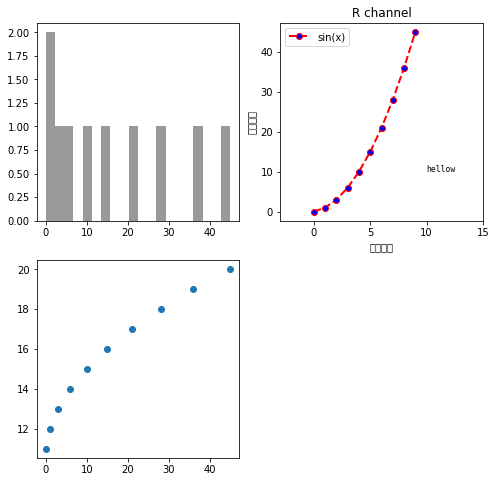

In [53]:
fig=plt.figure(num='窗口一',figsize=(8,8))
a=np.arange(10).cumsum()#累加
print(a)
ax1=plt.subplot(2,2,1)
ax1.hist(a,bins=20,color='k',alpha=0.4)#颜色和透明度   #如果只输入一个x,没有y，则这个x作为y，横坐标为0开始的整数

ax2=plt.subplot(2,2,2)
ax2.plot(a,'ro--',label="sin(x)",linewidth=2,markerfacecolor='blue')
plt.title('R channel')
plt.xlabel(u"整数序号")
plt.ylabel(u"整数累加")
#plt.ylim(-2,12)
plt.xlim(-3,15)#刻度范围
plt.legend()#图例生效
ax2.text(10,10,'hellow',family='monospace',fontsize=8)#字大小为8

ax3=plt.subplot(2,2,3)
ax3.scatter(a,np.arange(11,21,1))#传入了X和Y

In [54]:
#fig,axes=plt.subplots(2,3,figsize=(4,4))#比上面多了个s      sharex=True
#for i in range(2):
#    for j in range(2):
#        axes[i,j].hist(np.arange(0,3,1),bins=40,color='k')
#plt.subplots_adjust(wspace=0,hspace=0)
#print(np.arange(0,10,1))

In [55]:
#下面开始讲 pandas画图

In [56]:
array2=np.random.randn(10,4).cumsum(0)#二维的np
print(array2)
df1=pd.DataFrame(array2,columns=['a','b','c','d'])
print(df1)

[[ 0.81434313  0.78046993 -1.46405357 -0.15449119]
 [ 0.72191081  0.54259466 -2.21971634  1.6969467 ]
 [ 0.93100749  2.09761066 -2.78886499  0.63514994]
 [ 1.06325527  1.53437405 -0.39871903  0.88057279]
 [ 2.2158544   1.31013828 -0.72478034  0.84966137]
 [ 2.57157166  2.15972513 -0.84693435  0.1688098 ]
 [ 1.50369509  2.08304576 -0.27397162  0.62675687]
 [ 1.48587754  1.48290697 -0.12720636  1.19856175]
 [ 1.44905988  1.59527545 -0.27771069  2.11406102]
 [ 1.01085961  1.78081108  0.11671734  2.83958358]]
          a         b         c         d
0  0.814343  0.780470 -1.464054 -0.154491
1  0.721911  0.542595 -2.219716  1.696947
2  0.931007  2.097611 -2.788865  0.635150
3  1.063255  1.534374 -0.398719  0.880573
4  2.215854  1.310138 -0.724780  0.849661
5  2.571572  2.159725 -0.846934  0.168810
6  1.503695  2.083046 -0.273972  0.626757
7  1.485878  1.482907 -0.127206  1.198562
8  1.449060  1.595275 -0.277711  2.114061
9  1.010860  1.780811  0.116717  2.839584


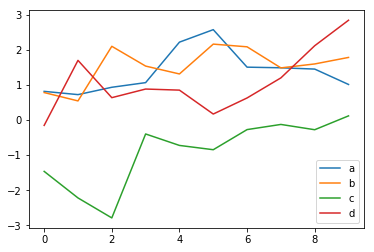

In [57]:
df1.plot()#index作为航坐标，value作为纵坐标
#其实df.plot()就相当于多条series的plot

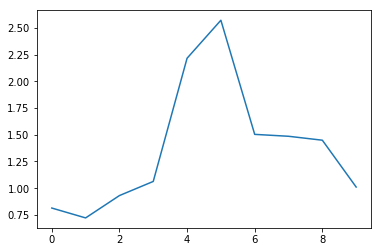

In [58]:
df1['a'].plot()#画一个series

1.449060    1
0.721911    1
2.571572    1
0.931007    1
1.485878    1
2.215854    1
0.814343    1
1.010860    1
1.063255    1
1.503695    1
Name: a, dtype: int64


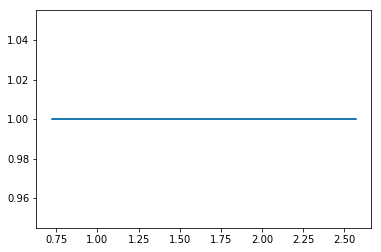

In [59]:
#series有一个很好的函数value_count，平时想看list的取值分布的话，可以先转为series，然后调用这个

a=df1['a'].value_counts(ascending=True)#取值的频次分布
print(a)
a.plot()

In [60]:
#柱状图bar  kind='bath'水平柱状图
dict1={'age':[22,19,30,44,55],'score':[90,88,100,60,60]}
df2=pd.DataFrame(dict1,index=['liang','wang','li','tang','sun'])
print(a)

1.449060    1
0.721911    1
2.571572    1
0.931007    1
1.485878    1
2.215854    1
0.814343    1
1.010860    1
1.063255    1
1.503695    1
Name: a, dtype: int64


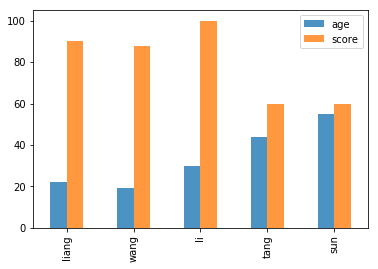

In [61]:
df2.plot(kind='bar',alpha=0.8)#,stacked=True堆积，但一般不用,alpha是透明度

In [62]:
#画图可以记住，行名每个ID的独有的，而列名是大家都有的属性


In [63]:
#找两个相关性：下面两幅图演示找相关性，直接用两个series
pd.crosstab(df2.age,df2.score)

score,60,88,90,100
age,,,,
19,0,1,0,0
22,0,0,1,0
30,0,0,0,1
44,1,0,0,0
55,1,0,0,0


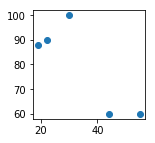

In [64]:
fig=plt.figure(num='窗口一',figsize=(2,2))
plt.scatter(df2.age,df2.score)

In [65]:
#直方图  bins 数据的宽度

In [66]:
print(df2)

       age  score
liang   22     90
wang    19     88
li      30    100
tang    44     60
sun     55     60


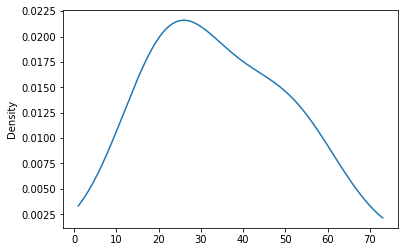

In [67]:
df2['age'].plot(kind='kde')# series的value_counts跟这个作用很类似，只不过是显示频次，这里是概率
#混合正态分布，可以看出年龄集中在哪

c:\lcb\py367\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE326CCF28>,
      dtype=object)

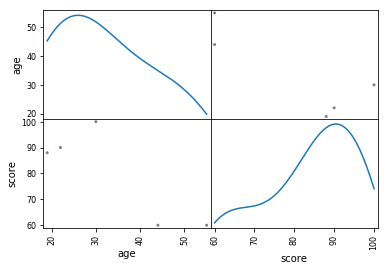

In [68]:
#散布图
#对一个df做scatter_matrix
pd.scatter_matrix(df2,diagonal='kde',color='k',alpha=0.5)#这里只有两个变量，所以只有2*2的图
#statsmodels macro data的散布图矩阵

       age  score
liang   22     90
wang    19     88
li      30    100
tang    44     60
sun     55     60
       age  score
liang   22     90
wang    19     88
      age  score
li     30    100
tang   44     60
sun    55     60


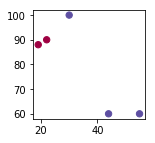

In [84]:
#模仿红点是年轻类，白点是老年类，跟age和score的关系
print(df2)
print(df2[df2.age<30])
print(df2[df2.age>=30])
x1=df2[df2.age<30].age
y1=df2[df2.age<30].score

x2=df2[df2.age>=30].age
y2=df2[df2.age>=30].score
#上下两种方法各有优势，上面的可以自己调色

#用下面这种,用c来分颜色，比较简单
fig=plt.figure(num='picture one',figsize=(2,2))
#plt.scatter(x1,y1,color='r')
#plt.scatter(x2,y2,color='b')

x1,x2=df2.age,df2.score
y=(df2.age>=30).tolist()#做一个类别,0,1或者true false都行
plt.scatter(x1, x2,s=40, c=y,cmap=plt.cm.Spectral)

In [70]:
#分类决策线

def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole grid
        Z = model(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.ylabel('x2')
        plt.xlabel('x1')
        plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

#建好模型之后，画出分界曲线
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')
plt.show()





AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

(400, 2)
(400, 1)
(400, 2)
(400, 1)


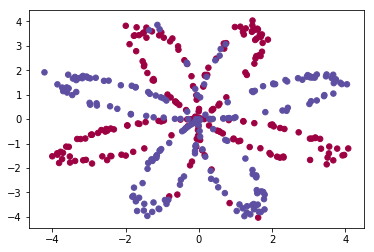

In [103]:
#可视化二维图,颜色分类
np.random.seed(1)  #种子就是产生随机数
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4
print(x.shape)#x一开始是(400,2)个0的np
print(y.shape)#y是400*1个0

for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
        
#处理以后有特殊形状
print(x.shape)#x一开始是(400,2)个0的np
print(y.shape)#y是400*1个0

#拿出x的第一维和第二维作为x,y轴

plt.scatter(x[:, 0], x[:, 1],s=30, c=y.reshape(-1),cmap=plt.cm.Spectral)#s似乎是点的深浅，大小  ,c控制着类别来上色


In [104]:
#画等高线，就是模型在这个点会产生什么高度
import numpy as np
def plot_decision_boundary(model, x, y):#model就是一个lambda
    # Set min and max values and give it some padding
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        h = 0.01#步长精度
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#根据横向和纵向的两个一维函数，建立两个个坐标矩阵
        # Predict the function value for the whole grid
        Z = model(np.c_[xx.ravel(), yy.ravel()])#使用模型lambda，相当于把网格中的每个点(xx,yy)都走一遍
        Z = Z.reshape(xx.shape)#输出的是1, 0，按照xx的格式排
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)#画出等高值,x,y这个位置的高度为0或1 #xx,yy,z都是二维的东西
        plt.ylabel('x2')
        plt.xlabel('x1')
        plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)#c是labe_llist

#建好模型之后，画出分界曲线   y分类用的,x是输入矩阵(默认2维度),module是与x对应的模型输出，
#plot_decision_boundary(lambda x: plot_logistic(x), x, y)#输入一个lambda，还有两个一维的数据,分别是feature1,feature2
#plt.title('logistic regression')
#plt.show()

In [102]:
#产生网格
x=np.arange(12).reshape(-1,2)
h=1
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 #画一个横，竖多少行看y，所以叫做meshgrid
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1#竖的看自己，横的看x
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#在点的最小值和最大值之间画网格，步长精度为h
print(xx)#重复10次从左到右
print(yy)#画十次，每次画一个高度的行


[[-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]
 [-1  0  1  2  3  4  5  6  7  8  9 10]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10 10 10]
 [11 11 11 11 11 11 11 11 11 11 11 11]]


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, -1,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, -1,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, -1,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, -1,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, -1,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, -1,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10])